<a href="https://colab.research.google.com/github/TIMEdilation584/JP_Loksatta_moving_hearts/blob/master/Exercise_1_1_2_Data_Acquisition_and_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import json
import matplotlib as mpl
from matplotlib import colors, patches
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
from typing import List

In [4]:
def get_data():
    """ simple wrapper function to get data """
    with open('/content/ground_truth.json') as f:
        ground_truth = json.load(f)
    
    with open('/content/predictions.json') as f:
        predictions = json.load(f)

    return ground_truth, predictions

In [5]:
# Fetching just the ground truth data
ground_truth, _ = get_data()

In [6]:
# Ground truth bounding box colours (three-class assumption)
class_colourmap = {1:'cyan',        # Vehicle 
                   2:'magenta',     # Pedestrian 
                   4:'yellow'}      # Unknown 
default = 'red'

In [7]:
# ImageGrid parameters
figsize = (24, 24)
ncols = 5
nrows = (len(ground_truth) // ncols)
axes_pad = 0.2
grid_params = [figsize, nrows, ncols, axes_pad, class_colourmap]

# Rectangle patch parameters
rect_params = {'fill': False,
               'edgecolor': default,
               'linewidth': 2,
               'linestyle': '--'}

In [8]:
def bbox_to_rectangle(bbox: List[int], **params) -> mpl.patches.Rectangle:
    """Renders bounding boxes as Matplotlib patches.
    
    Bounding box coordinate pairs form a single 
    orthogonal rectangle about the x-y plane.
    The upper-left coordinates are given by x1, y1
    and the lower-left coordinates by x2, y2.
    
    :param bbox: list of bounding box coordinates
    :param **params: dict-like object of `matplotlib.patches.Rectangle`
        parameters, e.g., `linewidth`, `color`, and `linestyle`.
    :returns: matplotlib Rectangle patch instance
    """
    return patches.Rectangle(xy=(bbox[0], bbox[1]), width=(bbox[2]-bbox[0]), height=(bbox[3]-bbox[1]), **params)

def viz(ground_truth: List[dict], *grid_params, **rect_params):
    """Creates a grid visualisation of dataset.
    
    Bounding boxes are rendered in colours corresponding
    to their respective class labels.
    
    :param ground_truth: list of ground truth bounding box coordinates
    :param *grid_params: list of `matplotlib.Figure` parameters
    :param **rect_params: dict-like object of `matplotlib.Rectangle`
        parameters, e.g., `linewidth`, `color`, and `linestyle`.
    """
    
    # Set up Matplotlib Figure and ImageGrid
    figsize = grid_params[0]
    nrows, ncols = grid_params[1], grid_params[2]
    axes_pad = grid_params[3]
    class_colourmap = grid_params[4]
    fig = plt.figure(figsize=figsize)
    grid = ImageGrid(fig, 111, nrows_ncols=(nrows, ncols), axes_pad=axes_pad)
    grid.axes_all[2].set_title('Ground truth bounding boxes')
    # For every image (scene) in dataset
    for i, scene in enumerate(ground_truth):
        # Display scene image in subplot
        image = cv2.imread('data/images/' + str(scene["filename"]))
        grid[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        grid[i].axis('off')
        for j, bbox in enumerate(scene['boxes']):
            # Get bounding box class label
            cls_bbox = scene['classes'][j]
            # Update bbox colour according to class label
            rect_params['edgecolor'] = class_colourmap.get(cls_bbox, 'red')
            grid[i].add_patch(bbox_to_rectangle(bbox, **rect_params))
    # Save figure as .png image
    plt.savefig(fname='out/2022-08-01-Data-Acquisition-Visualisation-Output.png')
    plt.show()

In [12]:
ls

exercise1_check.npy  images/     predictions.json
ground_truth.json    images.zip  sample_data/


In [ ]:
#!unzip images.zip

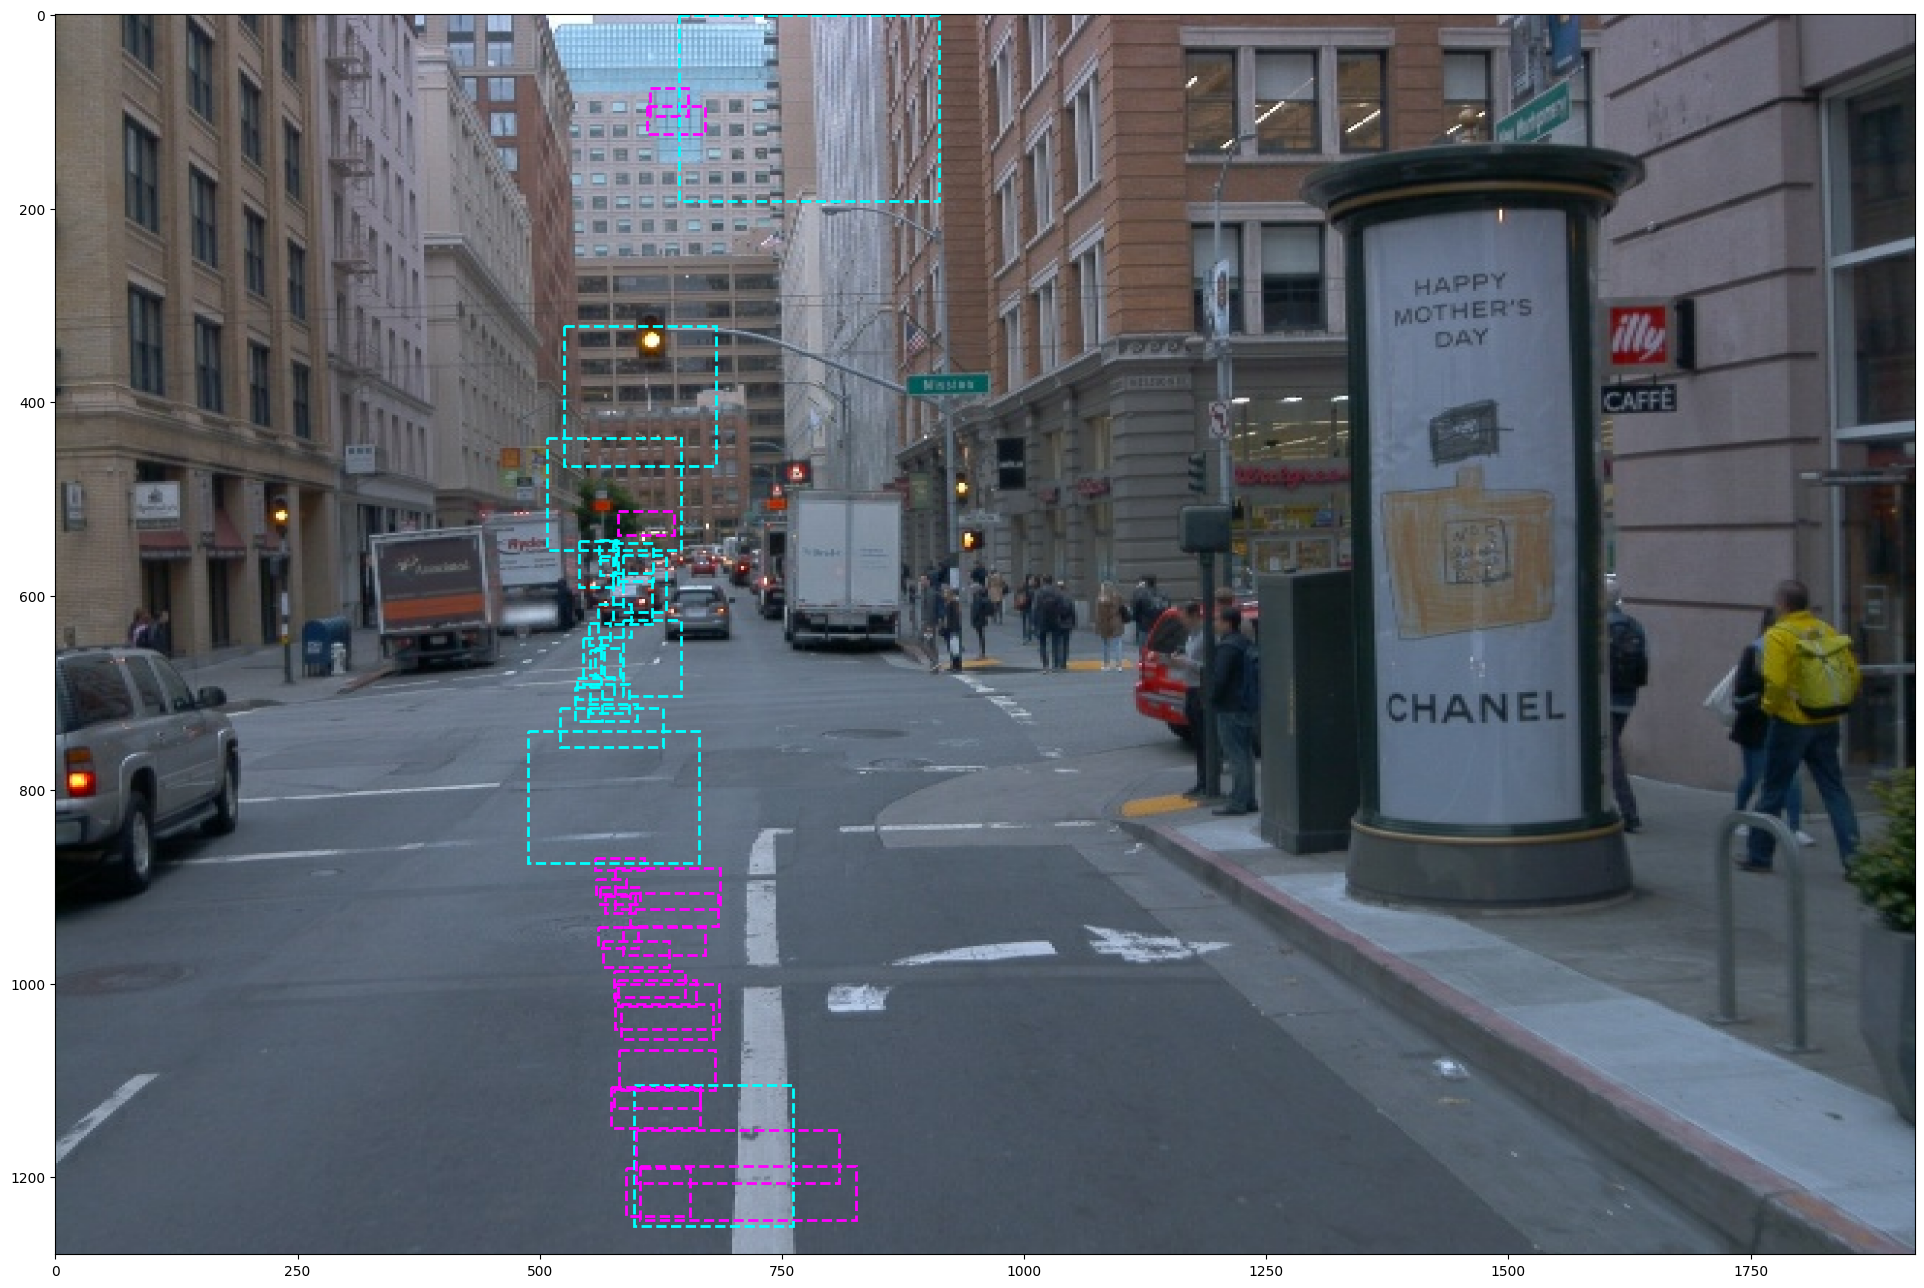

In [13]:
### Plotting the first scene with (erroneous) bounding box data
fig = plt.figure(figsize=(24,24))
image = cv2.imread('/content/images/' + str("segment-12251442326766052580_1840_000_1860_000_with_camera_labels_90.png"))
ax = fig.add_subplot(111)
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
for j, bbox in enumerate(ground_truth[0]['boxes']):
    # Get bounding box class
    cls_bbox = ground_truth[0]['classes'][j]
    # Update bbox color
    rect_params['edgecolor'] = class_colourmap.get(cls_bbox, 'red')
    ax.add_patch(bbox_to_rectangle(bbox, **rect_params))
plt.show()

In [14]:
### Before: [y1 x1 y2 x2]
ground_truth[0]['boxes'][0]

[576, 545, 617, 584]

In [15]:
### Fixing the error in Udacity's dataset
for i, gt in enumerate(ground_truth):
    for j, gt_bbox in enumerate(gt['boxes']):
        # Swapping the x- and y-coordinate values
        gt_bbox_corrected = [gt_bbox[1], gt_bbox[0], gt_bbox[3], gt_bbox[2]]
        ground_truth[i]['boxes'][j] = gt_bbox_corrected

In [16]:
### After: [x1 y1 x2 y2]
ground_truth[0]['boxes'][0]

[545, 576, 584, 617]

error: ignored

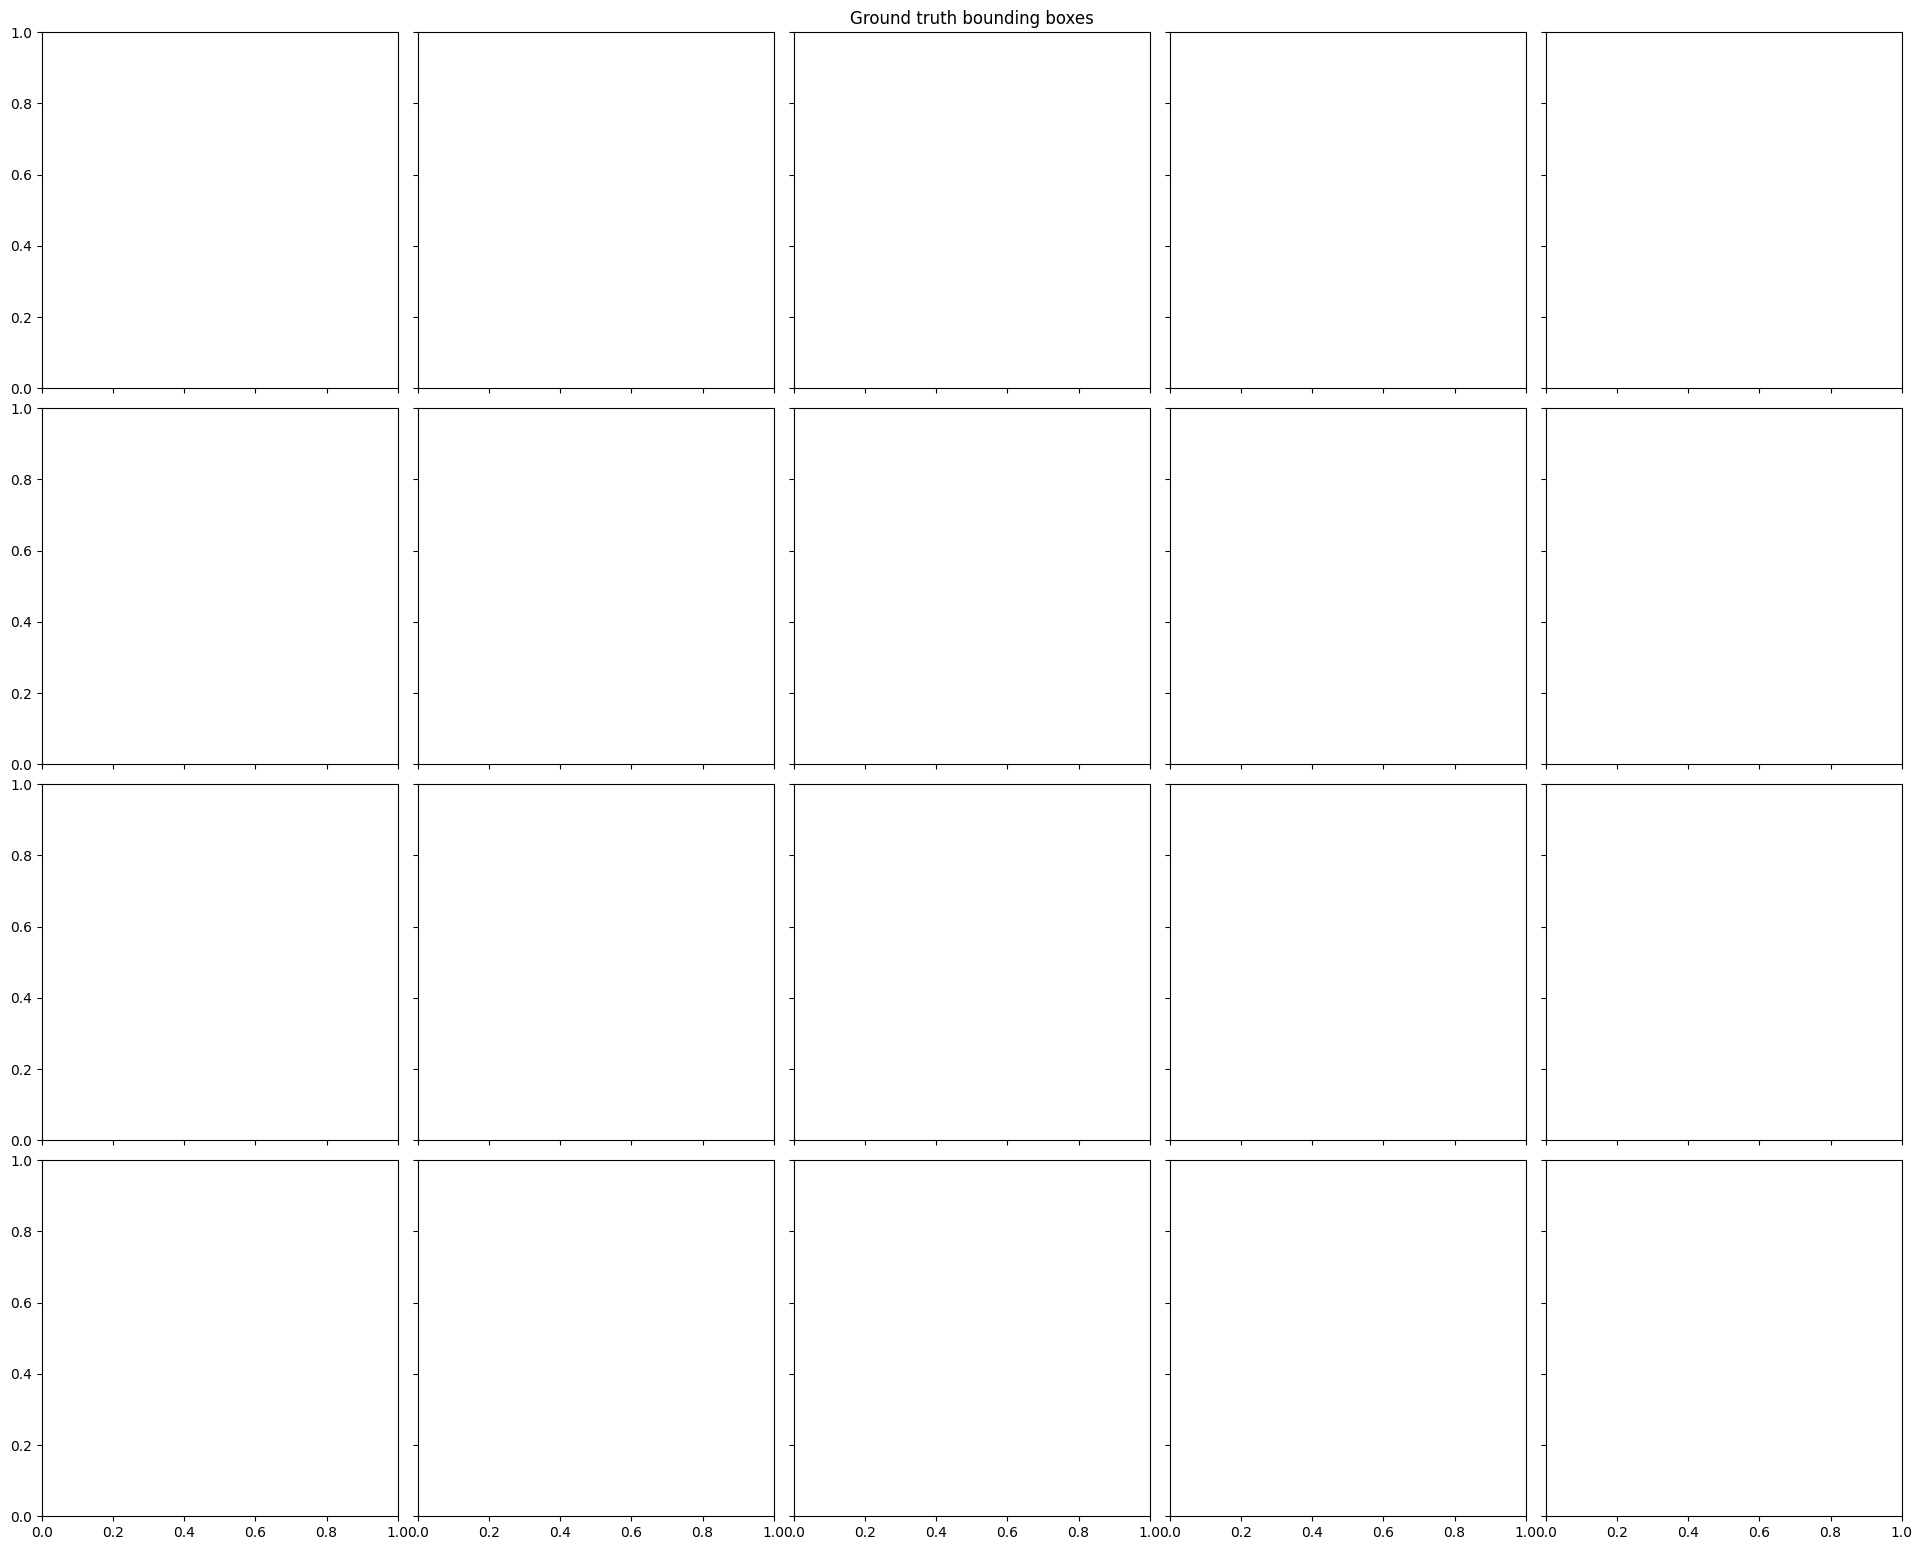

In [18]:
viz(ground_truth, *grid_params, **rect_params)